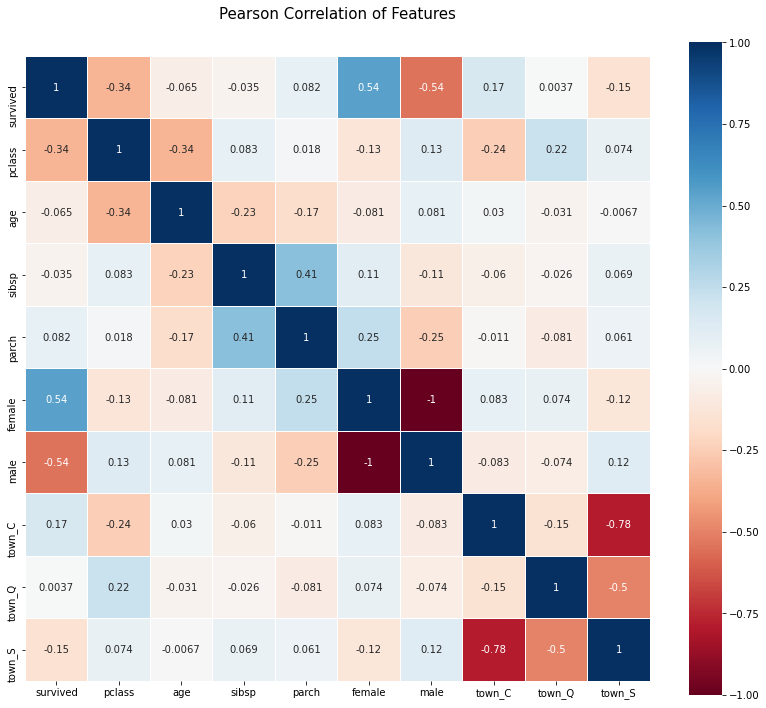

(891, 9) (891,)
(418, 9) (418,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[[255  11]
 [ 15 137]]
0.937799043062201
coeffi

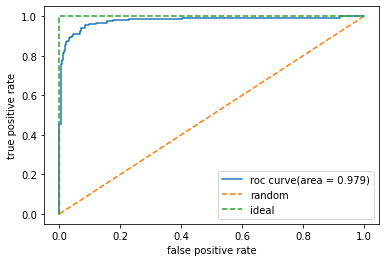

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')

df.columns = map(str.lower, df.columns)
df_t.columns = map(str.lower, df_t.columns)
y_test.columns = map(str.lower, y_test.columns)

#[2단계] 결손값 확인 제거하거나 치환한다.
#2-1. 데이터 프레임의 자료형을 확인

#2-2 결측(NaN) 컬럼을 확인하자.

rdf = df
rdf_t = df_t

#2-4 age의 결손값을 중간값으로 대처하자. 
rdf['age'].fillna(df['age'].median(),inplace = True)
rdf_t['age'].fillna(df_t['age'].median(),inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값 idxmax()으로 치환 fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace = True)

most_freg = rdf_t['embarked'].value_counts().idxmax()
rdf_t['embarked'].fillna(most_freg,inplace = True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기
# 분석에 필요한 속성 선택

ndf = rdf[['survived', 'pclass','sex','age','sibsp','parch','embarked']]
ndf_t = rdf_t[['pclass','sex','age','sibsp','parch','embarked']]

#범주형 데이터 숫자형 변환 (onehot) pd.get_dummies() sex, embarked
#범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis = 1)

emtown = pd.get_dummies(ndf['embarked'],prefix = 'town')
ndf = pd.concat([ndf,emtown],axis = 1)

ndf.drop(['sex','embarked'],axis = 1, inplace = True)

#--------------------------------------------------------------------------

gender = pd.get_dummies(ndf_t['sex'])
ndf_t = pd.concat([ndf_t,gender],axis = 1)

emtown = pd.get_dummies(ndf_t['embarked'],prefix = 'town')
ndf_t = pd.concat([ndf_t,emtown],axis = 1)

ndf_t.drop(['sex','embarked'],axis = 1, inplace = True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(ndf.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

#[4단계] 정규화 (독립변수(데이터))와 종속 변수(라벨)을 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X_train = ndf[[ 'pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]# 독립변수  
y_train = ndf['survived' ] #종속변수
X_test = ndf_t[[ 'pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]# 독립변수  
y_test = y_test['survived']

# 독립변수 정규화
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(type(y_train))
print(type(y_test))

# [5단계] 모델링
knn = LogisticRegression()
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 사망자와 생존자를 예측해보자
y_hat = knn.predict(X_test)
print(y_hat)

# [6단계] 모델 평가
knn_met = confusion_matrix(y_test, y_hat) # 이원화 작업, 교차표, 이원교차표
print(knn_met)

# 정확도 확인 : 정답률
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

print("coeffiecient = ", knn.coef_) # 계수 2*X + 3 = 7 에서 2가 계수
print("intercept = ", knn.intercept_) # 절편

print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_hat))
print('accuracy = ', accuracy_score(y_true = y_test, y_pred = y_hat))
print('precision = ', precision_score(y_true = y_test, y_pred = y_hat))
print('recall = ', recall_score(y_true = y_test, y_pred = y_hat))
print('f1 score = ', f1_score(y_true = y_test, y_pred = y_hat))

Y_score = knn.predict_proba(X_test)[:, 1]

# roc_curve : 곡선의 아래 면적으로 값이 클수록 분류 성분이 좋다.
# 가로(FPR), 세로(TPR)
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = Y_score)

plt.plot(fpr, tpr, label = 'roc curve(area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle = '--', label = 'ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()